In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/SOUMYA/Downloads/SMSSpamCollection",sep="\t",names=["lebel","messege"])

In [3]:
df.shape

(5572, 2)

In [4]:
df.head()

,lebel,messege
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df["lebel"].value_counts()

lebel
ham     4825
spam     747
Name: count, dtype: int64

In [6]:
len(df)

5572

<Axes: xlabel='lebel', ylabel='count'>

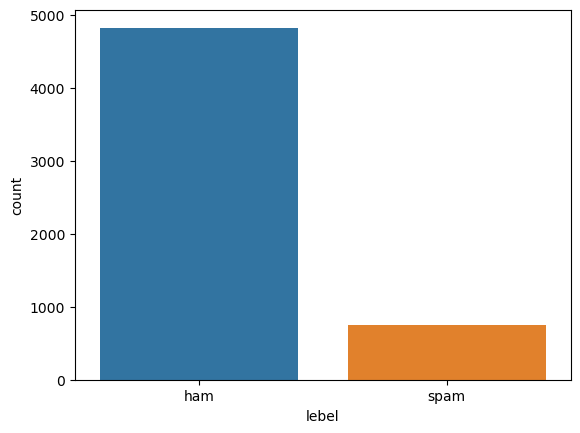

In [7]:
sns.countplot(x="lebel",data=df)

In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [9]:
ps=PorterStemmer()
ps

<PorterStemmer>

In [10]:
corpus=[]
for i in range(0,len(df)):
    new=re.sub("[^a-zAZ]"," ",df["messege"][i])
    new=new.lower()
    new=new.split()
    new=[ps.stem(clean) for clean in new if clean not in stopwords.words("english")]
    new=" ".join(new)
    corpus.append(new)

In [11]:
corpus

['jurong point crazi avail bugi n great world la e buffet ine got amor wat',
 'k lar oke wif u oni',
 'ree entri wkli comp win final tkt st ay ext receiv entri question std txt rate appli',
 'dun say earli hor c alreadi say',
 'ah think goe usf live around though',
 'ree sg ey darl week word back like fun still b ok x std chg send rcv',
 'ven brother like speak hey treat like aid patent',
 'per request ell ell ru innaminungint urungu ettam set callertun aller ress copi friend allertun',
 'valu network custom select receivea prize reward claim call laim code alid hour',
 'ad mobil month entitl pdate latest colour mobil camera ree obil pdate',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'chanc win rom pound txt send ost p day day sand appli epli info',
 'ou week membership rize ackpot xt word www dbuk net',
 'search right word thank breather promis wont take help grant fulfil promis ou wonder bless time',
 '',
 'obil ovi lub use credit click link next txt messa

In [12]:
len(corpus)

5572

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [106]:
bow=CountVectorizer(ngram_range=(2,2),max_features=10,binary=True)
bow

CountVectorizer(binary=True, max_features=10, ngram_range=(2, 2))

In [107]:
new=bow.fit_transform(corpus)
new.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [108]:
new.shape

(5572, 10)

In [109]:
len(df["messege"])

5572

In [110]:
y=pd.get_dummies(df["lebel"],drop_first=True).astype(int)
y

,spam
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [112]:
X=new.toarray()
X[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [113]:
y

,spam
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [114]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=.20,random_state=41)

In [115]:
Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape

((4457, 10), (4457, 1), (1115, 10), (1115, 1))

In [116]:
model=MultinomialNB()
model

MultinomialNB()

In [117]:
model.fit(Xtrain,ytrain)

C:\Users\SOUMYA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [118]:
ypred=model.predict(Xtest)

In [119]:
from sklearn.metrics import confusion_matrix,classification_report

In [120]:
cm=confusion_matrix(ytest,ypred)
cm

array([[948,   1],
       [132,  34]], dtype=int64)

<Axes: >

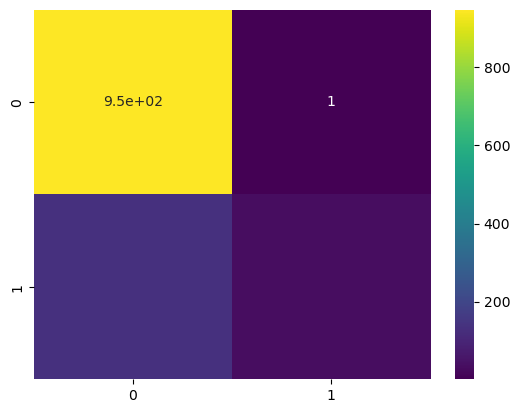

In [121]:
sns.heatmap(cm,annot=True,cmap="viridis")

In [122]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       949
           1       0.97      0.20      0.34       166

    accuracy                           0.88      1115
   macro avg       0.92      0.60      0.64      1115
weighted avg       0.89      0.88      0.85      1115



In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
model2=RandomForestClassifier()

In [125]:
model2.fit(Xtrain,ytrain)

C:\Users\SOUMYA\AppData\Local\Temp\ipykernel_11212\2029726956.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(Xtrain,ytrain)


RandomForestClassifier()

In [126]:
ypred2=model2.predict(Xtest)

In [127]:
cm2=confusion_matrix(ytest,ypred2)
cm2

array([[948,   1],
       [132,  34]], dtype=int64)

In [128]:
print(classification_report(ytest,ypred2))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       949
           1       0.97      0.20      0.34       166

    accuracy                           0.88      1115
   macro avg       0.92      0.60      0.64      1115
weighted avg       0.89      0.88      0.85      1115



<Axes: >

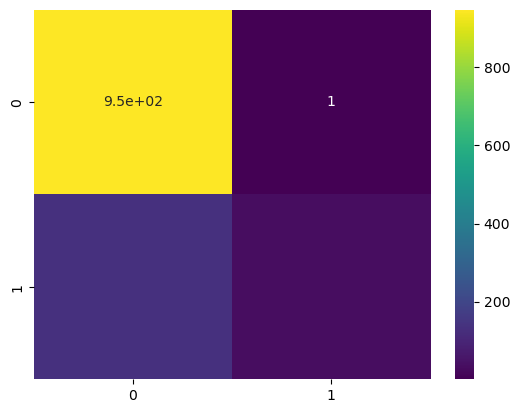

In [129]:
sns.heatmap(cm2,annot=True,cmap="viridis")

In [130]:
len(X[0])

10

In [131]:
messege=[0,0,1,0,1,0,0,1,0,1]

In [149]:
model.predict([[0,0,0,0,0,0,1,0,1,0]])[0]

0